<a href="https://colab.research.google.com/github/BillDevData/Challenge-3-Data-Science/blob/main/Notebook_del_challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Carga y lectura del Dataset

In [1]:
import pandas as pd

In [40]:
url = 'https://raw.githubusercontent.com/BillDevData/Challenge-3-Data-Science/refs/heads/main/datos_procesados.csv'
datos = pd.read_csv(url)
datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
6386,9060-HJJRW,False,Female,False,False,False,51,False,No phone service,DSL,...,Yes,No,Yes,Yes,One year,True,Credit card (automatic),56.40,2928.50,1.88
1161,1707-HABPF,False,Female,True,False,False,46,True,No,Fiber optic,...,Yes,No,Yes,No,One year,True,Bank transfer (automatic),91.30,4126.35,3.04
675,0988-JRWWP,False,Female,False,False,False,3,True,No,DSL,...,No,No,Yes,No,Month-to-month,True,Electronic check,54.20,140.40,1.81
1354,2017-CCBLH,False,Female,False,False,False,8,True,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,141.60,0.67
4571,6463-MVYRY,False,Female,True,False,False,57,True,No,DSL,...,Yes,Yes,Yes,No,Two year,False,Bank transfer (automatic),69.85,4003.00,2.33
4156,5889-LFOLL,True,Female,False,False,False,13,True,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,True,Electronic check,84.60,1115.20,2.82
454,0667-NSRGI,False,Female,False,True,False,48,True,Yes,DSL,...,Yes,Yes,No,Yes,One year,True,Mailed check,69.55,3435.60,2.32
6607,9402-ROUMJ,False,Female,False,True,True,67,True,Yes,Fiber optic,...,Yes,Yes,No,Yes,One year,True,Bank transfer (automatic),100.25,6689.00,3.34
6427,9114-DPSIA,False,Male,False,True,True,72,True,Yes,DSL,...,Yes,Yes,No,Yes,Two year,False,Credit card (automatic),81.00,5750.00,2.70
209,0324-BRPCJ,True,Female,True,True,False,68,True,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,True,Electronic check,100.20,6851.65,3.34


In [44]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   bool   
 4   Partner           7032 non-null   bool   
 5   Dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   bool   
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


### Depurando columnas redundantes y de baja relevancia

In [46]:
# Columnas a eliminar
cols_drop = [
    'customerID',       # identificador único
    'Charges.Total',    # puede redundar con tenure
    'PhoneService',     # nos quedamos solo con MultipleLines, que da la misma info pero más detallada
    # Columnas de servicios de internet redundantes: sugieren multicolinealidad
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Cuentas_Diarias' #Posible relación con tenure
]

datos_depurados = datos.drop(columns=cols_drop).copy()
datos_depurados

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,False,Female,False,True,True,9,No,DSL,One year,True,Mailed check,65.60
1,False,Male,False,False,False,9,Yes,DSL,Month-to-month,False,Mailed check,59.90
2,True,Male,False,False,False,4,No,Fiber optic,Month-to-month,True,Electronic check,73.90
3,True,Male,True,True,False,13,No,Fiber optic,Month-to-month,True,Electronic check,98.00
4,True,Female,True,True,False,3,No,Fiber optic,Month-to-month,True,Mailed check,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...
7027,False,Female,False,False,False,13,No,DSL,One year,False,Mailed check,55.15
7028,True,Male,False,True,False,22,Yes,Fiber optic,Month-to-month,True,Electronic check,85.10
7029,False,Male,False,False,False,2,No,DSL,Month-to-month,True,Mailed check,50.30
7030,False,Male,False,True,True,67,No,DSL,Two year,False,Mailed check,67.85


### Codificando las columnas categóricas

In [47]:
datos_depurados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   bool   
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   bool   
 3   Partner           7032 non-null   bool   
 4   Dependents        7032 non-null   bool   
 5   tenure            7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   Contract          7032 non-null   object 
 9   PaperlessBilling  7032 non-null   bool   
 10  PaymentMethod     7032 non-null   object 
 11  Charges.Monthly   7032 non-null   float64
dtypes: bool(5), float64(1), int64(1), object(5)
memory usage: 419.0+ KB


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [49]:
categorical_cols = [
    'gender', 'MultipleLines', 'InternetService',
    'Contract', 'PaymentMethod'
]

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_array = encoder.fit_transform(datos_depurados[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=datos_depurados.index)

numerical_bool_cols = ['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling', 'Charges.Monthly']
datos_codificados = pd.concat([datos_depurados[numerical_bool_cols], encoded_df], axis=1)

datos_codificados

,Churn,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,False,True,True,9,True,65.60,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,False,False,False,False,9,False,59.90,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,True,False,False,False,4,True,73.90,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,True,True,True,False,13,True,98.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,True,True,True,False,3,True,83.90,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,False,False,False,False,13,False,55.15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,True,False,True,False,22,True,85.10,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7029,False,False,False,False,2,True,50.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7030,False,False,True,True,67,False,67.85,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [50]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   bool   
 1   SeniorCitizen                          7032 non-null   bool   
 2   Partner                                7032 non-null   bool   
 3   Dependents                             7032 non-null   bool   
 4   tenure                                 7032 non-null   int64  
 5   PaperlessBilling                       7032 non-null   bool   
 6   Charges.Monthly                        7032 non-null   float64
 7   gender_Male                            7032 non-null   float64
 8   MultipleLines_No phone service         7032 non-null   float64
 9   MultipleLines_Yes                      7032 non-null   float64
 10  InternetService_Fiber optic            7032 non-null   float64
 11  Inte

### Balanceando

In [51]:
churn_percent = datos_codificados['Churn'].value_counts(normalize=True) * 100
churn_percent

,proportion
Churn,
False,73.421502
True,26.578498


In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
X = datos_codificados.drop(columns=['Churn'])
y = datos_codificados['Churn']

smote = SMOTE(random_state=42)

X_over, y_over = smote.fit_resample(X, y) #BALANCEANDO

In [54]:
y_over.value_counts(normalize=True) * 100

,proportion
Churn,
False,50.0
True,50.0


In [55]:
y_over.shape

(10326,)

In [56]:
X_over.shape

(10326, 16)

### Normalizando las variables

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_over_scaled = scaler.fit_transform(X_over)

X_over_scaled

array([[-0.55221485,  1.02649856,  1.5775023 , ..., -0.48503158,
        -0.88185315,  2.00535302],
       [-0.55221485, -0.97418549, -0.6339135 , ..., -0.48503158,
        -0.88185315,  2.00535302],
       [-0.55221485, -0.97418549, -0.6339135 , ..., -0.48503158,
         1.2094398 , -0.52181865],
       ...,
       [ 1.81088938,  1.02649856,  1.5775023 , ..., -0.48503158,
         1.2094398 , -0.52181865],
       [ 1.81088938,  1.02649856,  1.5775023 , ..., -0.48503158,
         1.2094398 , -0.52181865],
       [-0.55221485, -0.97418549, -0.6339135 , ..., -0.48503158,
         0.57668067,  0.2428236 ]])

### Visibilizando la matriz de correlación

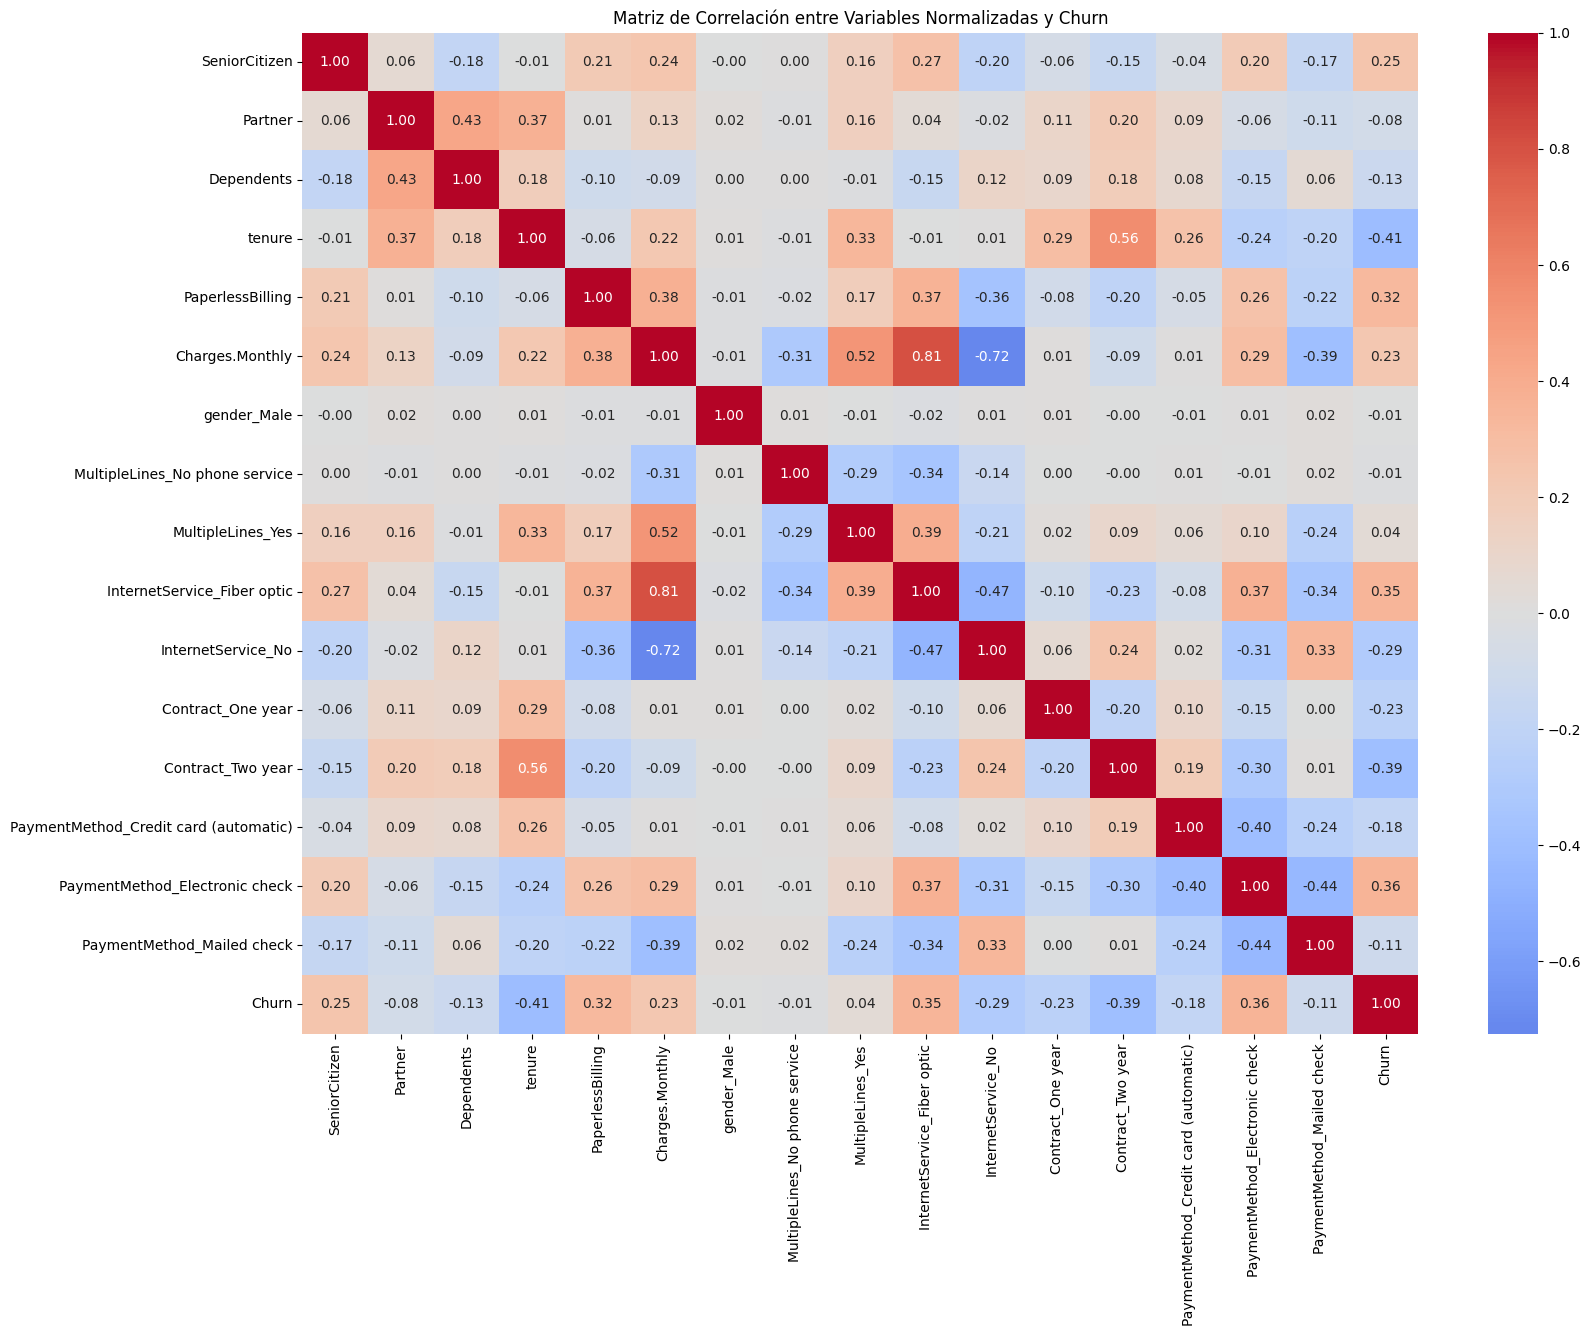

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir X_over_scaled a DataFrame para poder trabajar con columnas
X_scaled_df = pd.DataFrame(X_over_scaled, columns=X_over.columns, index=X_over.index)

# Concatenar con y_over para ver la correlación con Churn
data_corr = pd.concat([X_scaled_df, y_over.rename('Churn')], axis=1)

# Calcular la matriz de correlación
corr_matrix = data_corr.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(18,13))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlación entre Variables Normalizadas y Churn")
plt.show()

In [59]:
# Calcular la correlación con Churn
corr_with_churn = corr_matrix['Churn'].drop('Churn')  # Quitamos la correlación de Churn consigo misma

# Filtrar solo aquellas con correlación significativa (por ejemplo > 0.2 o < -0.2)
significant_corr = corr_with_churn[abs(corr_with_churn) >= 0.2].sort_values(ascending=False)

print("Variables con correlación significativa con Churn:")
print(significant_corr)

Variables con correlación significativa con Churn:
PaymentMethod_Electronic check    0.357713
InternetService_Fiber optic       0.345767
PaperlessBilling                  0.324904
SeniorCitizen                     0.247387
Charges.Monthly                   0.229546
Contract_One year                -0.226519
InternetService_No               -0.287490
Contract_Two year                -0.392087
tenure                           -0.411785
Name: Churn, dtype: float64


### Análisis dirigido, variable a variable

/tmp/ipython-input-3902703838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


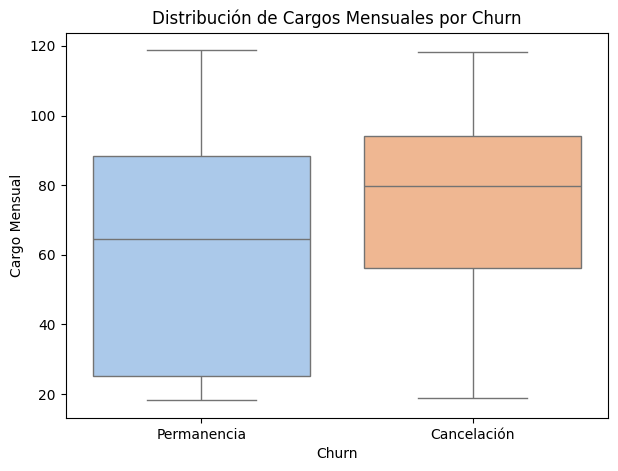

In [20]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=datos_codificados,
    x=datos_codificados['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    y='Charges.Monthly',
    palette="pastel"
)

plt.title('Distribución de Cargos Mensuales por Churn')
plt.xlabel('Churn')
plt.ylabel('Cargo Mensual')
plt.show()

/tmp/ipython-input-3444897877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


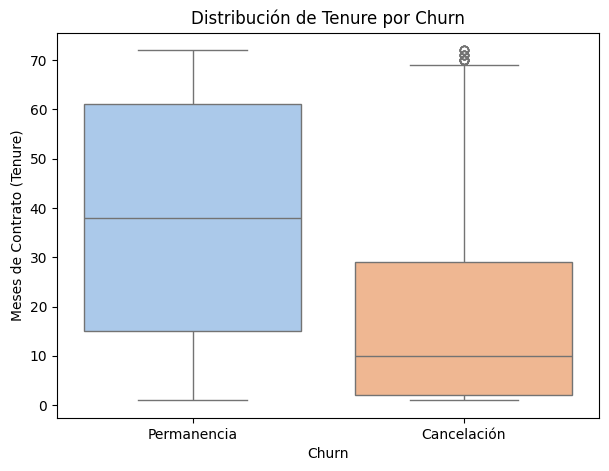

In [61]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=datos_codificados,
    x=datos_codificados['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    y='tenure',
    palette="pastel"
)

plt.title('Distribución de Tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Meses de Contrato (Tenure)')
plt.show()

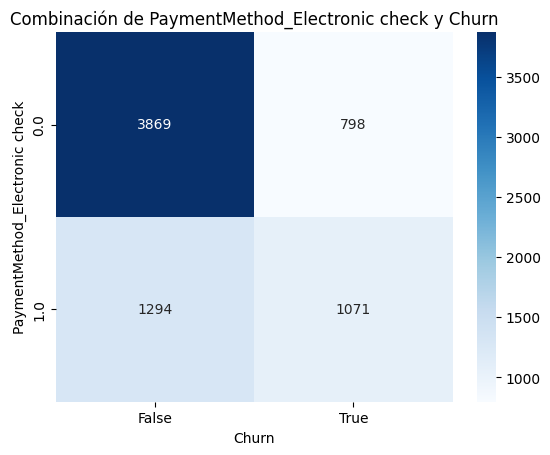

In [62]:
contingency = pd.crosstab(datos_codificados['PaymentMethod_Electronic check'], datos_codificados['Churn'])

sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title('Combinación de PaymentMethod_Electronic check y Churn')
plt.xlabel('Churn')
plt.ylabel('PaymentMethod_Electronic check')
plt.show()

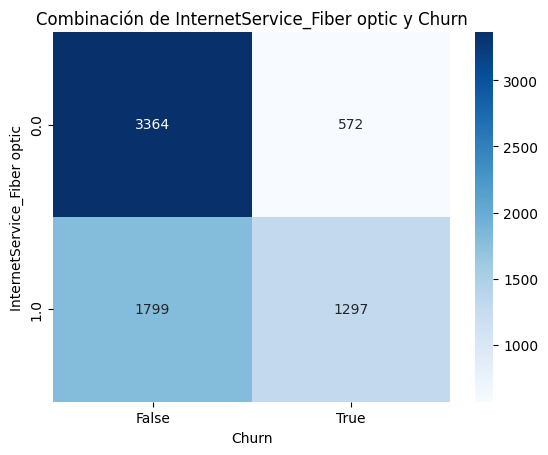

In [63]:
contingency = pd.crosstab(datos_codificados['InternetService_Fiber optic'], datos_codificados['Churn'])

sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title('Combinación de InternetService_Fiber optic y Churn')
plt.xlabel('Churn')
plt.ylabel('InternetService_Fiber optic')
plt.show()

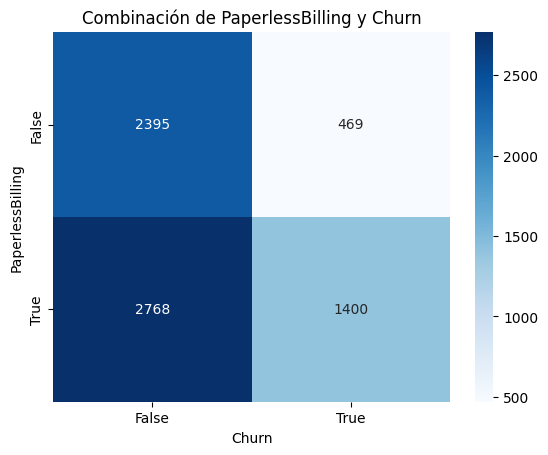

In [64]:
contingency = pd.crosstab(datos_codificados['PaperlessBilling'], datos_codificados['Churn'])

sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title('Combinación de PaperlessBilling y Churn')
plt.xlabel('Churn')
plt.ylabel('PaperlessBilling')
plt.show()

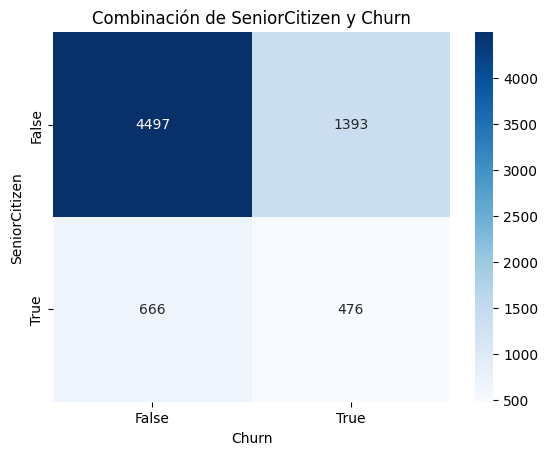

In [65]:
contingency = pd.crosstab(datos_codificados['SeniorCitizen'], datos_codificados['Churn'])

sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title('Combinación de SeniorCitizen y Churn')
plt.xlabel('Churn')
plt.ylabel('SeniorCitizen')
plt.show()

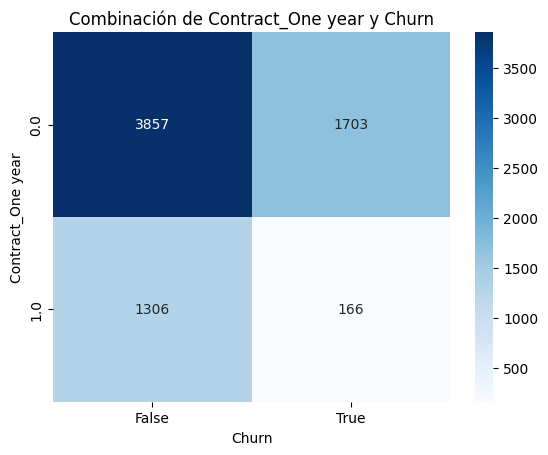

In [68]:
contingency = pd.crosstab(datos_codificados['Contract_One year'], datos_codificados['Churn'])

sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title('Combinación de Contract_One year y Churn')
plt.xlabel('Churn')
plt.ylabel('Contract_One year')
plt.show()

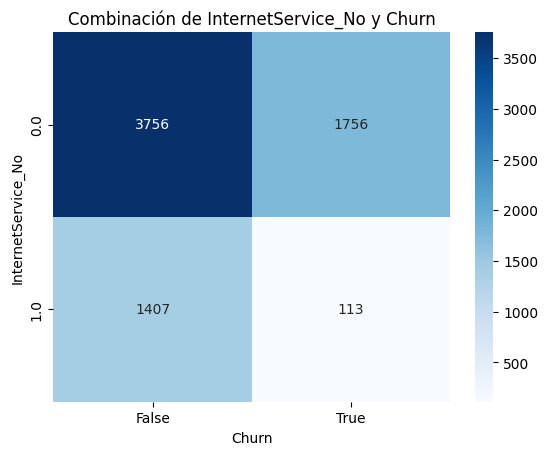

In [69]:
contingency = pd.crosstab(datos_codificados['InternetService_No'], datos_codificados['Churn'])

sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title('Combinación de InternetService_No y Churn')
plt.xlabel('Churn')
plt.ylabel('InternetService_No')
plt.show()

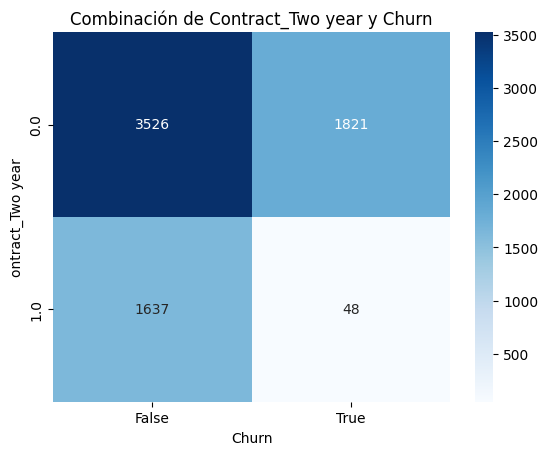

In [71]:
contingency = pd.crosstab(datos_codificados['Contract_Two year'], datos_codificados['Churn'])

sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title('Combinación de Contract_Two year y Churn')
plt.xlabel('Churn')
plt.ylabel('ontract_Two year')
plt.show()

### Separación de datos

In [74]:
X_over_scaled

array([[-0.55221485,  1.02649856,  1.5775023 , ..., -0.48503158,
        -0.88185315,  2.00535302],
       [-0.55221485, -0.97418549, -0.6339135 , ..., -0.48503158,
        -0.88185315,  2.00535302],
       [-0.55221485, -0.97418549, -0.6339135 , ..., -0.48503158,
         1.2094398 , -0.52181865],
       ...,
       [ 1.81088938,  1.02649856,  1.5775023 , ..., -0.48503158,
         1.2094398 , -0.52181865],
       [ 1.81088938,  1.02649856,  1.5775023 , ..., -0.48503158,
         1.2094398 , -0.52181865],
       [-0.55221485, -0.97418549, -0.6339135 , ..., -0.48503158,
         0.57668067,  0.2428236 ]])

In [75]:
from sklearn.model_selection import train_test_split

# 80% entrenamiento / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_over_scaled,
    y_over,
    test_size=0.2,
    random_state=42,
    stratify=y_over
)

print("Tamaño entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño prueba:", X_test.shape, y_test.shape)

Tamaño entrenamiento: (8260, 16) (8260,)
Tamaño prueba: (2066, 16) (2066,)


# Obteniendo Baseline

In [79]:
from sklearn.dummy import DummyClassifier

In [80]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.5

# Modelado y evaluación de los modelos

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Modelo RandomForest

In [82]:
modelo1_rf = RandomForestClassifier(random_state=42)
modelo1_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred_rf = modelo1_rf.predict(X_test)

print("************************** Modelo Random Forest **************************")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

************************** Modelo Random Forest **************************
              precision    recall  f1-score   support

       False       0.85      0.86      0.85      1033
        True       0.86      0.84      0.85      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Accuracy: 0.851403678606002


Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
modelo2_lr = LogisticRegression(random_state=42, max_iter=1000)
modelo2_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [87]:
y_pred_lr = modelo2_lr.predict(X_test)

print("************************** Logistic Regression **************************")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

************************** Logistic Regression **************************
              precision    recall  f1-score   support

       False       0.79      0.74      0.76      1033
        True       0.76      0.80      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Accuracy: 0.771539206195547


In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
modelo3_knn = KNeighborsClassifier(n_neighbors=5)
modelo3_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
y_pred_knn = modelo3_knn.predict(X_test)

print("************************** K-Nearest Neighbors **************************")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

************************** K-Nearest Neighbors **************************
              precision    recall  f1-score   support

       False       0.81      0.78      0.79      1033
        True       0.78      0.82      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066

Accuracy: 0.797676669893514


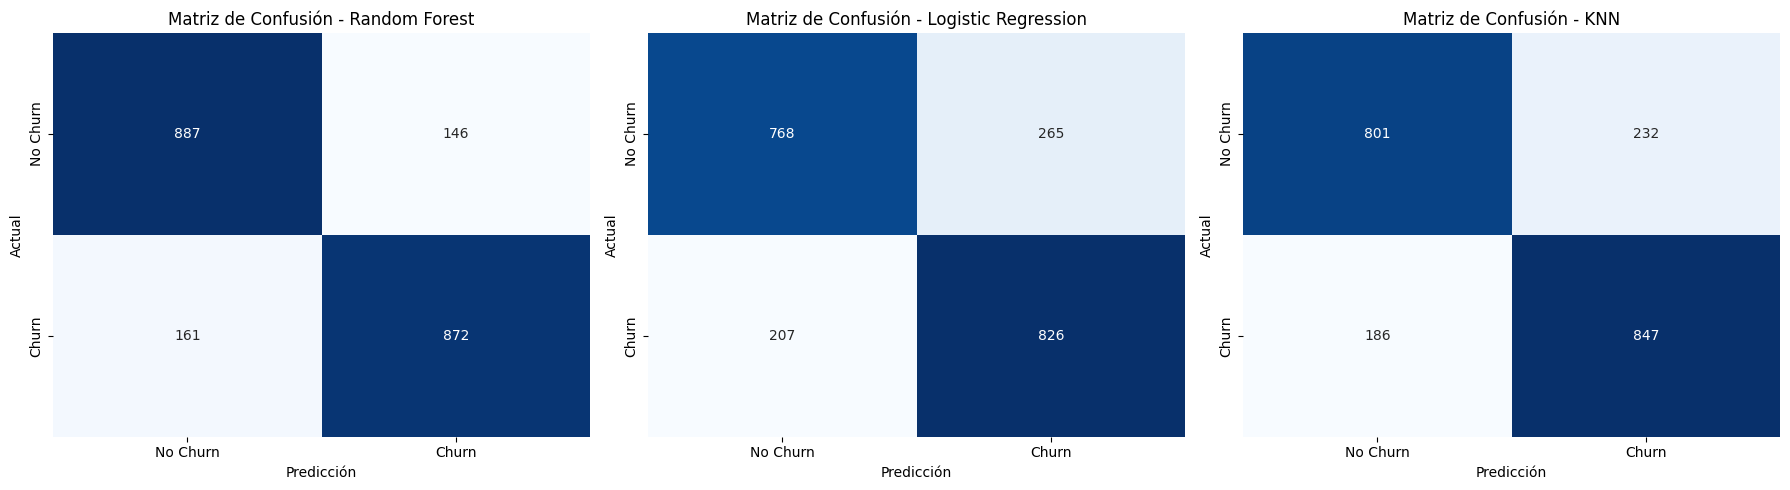

In [92]:
modelos = {
    "Random Forest": y_pred_rf,
    "Logistic Regression": y_pred_lr,
    "KNN": y_pred_knn
}

plt.figure(figsize=(18,5))

for i, (nombre, y_pred) in enumerate(modelos.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=["No Churn", "Churn"],
                yticklabels=["No Churn", "Churn"])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.ylabel('Actual')
    plt.xlabel('Predicción')

plt.tight_layout()
plt.show()